# Import Data

In [1]:
import pandas as pd 
data = pd.read_csv(r'C:\Users\c2088238\Downloads\Coursework_1_data(1).csv') #

# Data Exploration

In [2]:
data.shape #shape of data

(12330, 18)

In [3]:
data.describe() #statistics of the given data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
data.info() #information about the data(includes data type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
data.isna().sum() #checking for any missing values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D0BC26A48>,
      dtype=object)

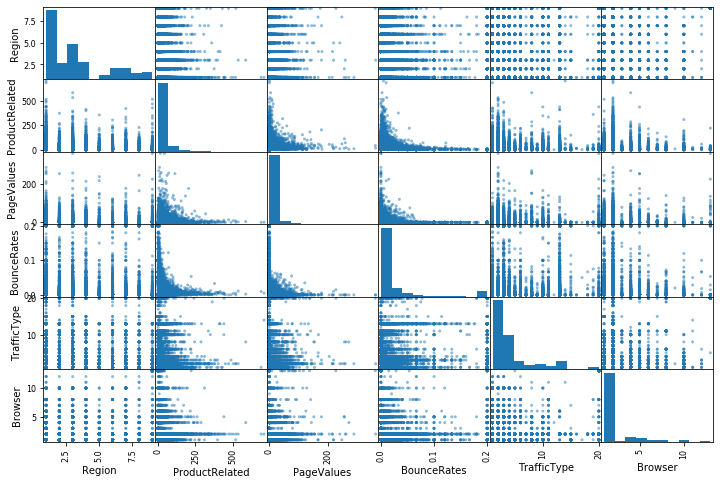

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['Region','ProductRelated','PageValues','BounceRates','TrafficType','Browser']], figsize=(12, 8))

#plot scatter matrix to udnerstan linear relationship between the columns

In [7]:
corr_matrix = data.corr()
print(corr_matrix)  #correlation matrix to understand the colinearity between columns 

                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561         

# Data PreProcessing 

In [6]:
from sklearn.preprocessing import OneHotEncoder,RobustScaler,MinMaxScaler
cat_cols = data[['OperatingSystems','Browser','Region','TrafficType','VisitorType','Month']] #considered only the categorical columns
cat_names=['OperatingSystems','Browser','Region','TrafficType','VisitorType','Month']

enc = OneHotEncoder(sparse=False, handle_unknown='ignore') #Encoding data using OneHotEncoder in array form
enc.fit(cat_cols)                                       #fitting encoding into categorical data

cat_labels=list(enc.categories_[0])+list(enc.categories_[1])
cat_labels=list([item for arr in enc.categories_ for item in arr.tolist()])

enc_data =  pd.DataFrame(enc.transform(cat_cols))       
data_enc = data
data_enc[cat_labels]=enc_data                 #final encoded data for cat values

enc.fit(data[['Weekend','Revenue']])         #encoding the boolean categorical data

data_enc[['Weekend_F','Weekend','Revenue_F','Revenue']] = pd.DataFrame(enc.transform(data[['Weekend','Revenue']]))

data_enc = data_enc.drop(cat_names,axis=1)     #droping original columnames
data_enc = data_enc.drop(['Weekend_F','Revenue_F'],axis = 1)    #dropping one of the encoded column 
data_enc.head(20)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
X = data_enc.loc[ : , data_enc.columns != 'Revenue']   #considered all columns except revenue from encoded data

y = data_enc[['Revenue']]    #considering Revenue column from encoded data

In [8]:
#splitting encoded data into train and test model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify=y,shuffle=True) 
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [9]:
#scaler=RobustScaler()   #using RobustScaler to optimize data along with outliers
scaler=MinMaxScaler()   #using MinMaxScaler to optimize data within range[0,1]

num_cols=['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated',
         'ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

scaled_df=scaler.fit_transform(X_train[num_cols])   #scaling train numerical data to be standardized

X_train[num_cols] = scaled_df    

scaled_df=scaler.fit_transform(X_test[num_cols])   #scaling test numerical data to be standardized

X_test[num_cols] = scaled_df


# Model Implementation

#RandomForest Classifier

In [10]:
import time
time_start = time.time()

#using RandomForest Classifier model to implement
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

rnd_clf = RandomForestClassifier(n_estimators=100, max_depth=500, random_state=42,n_jobs=-1)

rnd_clf.fit(X_train,y_train)

y_pred = rnd_clf.predict(X_test)

#calculating the classification report with applied parameters to determine accuracy,f1score,recall,precision,support
#Also calculated the confusion matrix

#print(round(accuracy_score(y_test,y_pred),4))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f'Time Taken:{(time.time()-time_start)}')

C:\Users\c2088238\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


[[2535   71]
 [ 247  230]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      2606
         1.0       0.76      0.48      0.59       477

    accuracy                           0.90      3083
   macro avg       0.84      0.73      0.77      3083
weighted avg       0.89      0.90      0.89      3083

Time Taken:0.8049509525299072


#Hyperparameter optimization using RandomSearch on RandomForest Classifier

In [11]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
import numpy as np

tree_hyp =  dict(n_estimators = [int(x) for x in np.linspace(10, 110, num = 11)],
                max_features = ['auto', 'sqrt'],max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                min_samples_split = [2, 5, 10],bootstrap = [True, False])

# define RF classification model
rnd_clf = RandomForestClassifier()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)

# define search
search = RandomizedSearchCV(rnd_clf, tree_hyp, n_iter=200, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

C:\Users\c2088238\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Score: 0.9059696370150152
Best Hyperparameters: {'n_estimators': 90, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [7]:
#calculating the classification report from best hyperparameter used in RF classifier to determine accuracy,f1score,recall,precision,support
#Also calculated the confusion matrix


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

y_pred = result.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2518   88]
 [ 229  248]]
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      2606
         1.0       0.74      0.52      0.61       477

    accuracy                           0.90      3083
   macro avg       0.83      0.74      0.78      3083
weighted avg       0.89      0.90      0.89      3083



#Logistic Regression Model 

In [12]:
import time
time_start = time.time()

#using LogisticRegression Classifier model to implement
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

log_reg = LogisticRegression(solver="liblinear", random_state=42)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

#calculating the classification report with applied parameters to determine accuracy,f1score,recall,precision,support
#Also calculated the confusion matrix

#print(round(accuracy_score(y_test,y_pred),4))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(f'Time Taken: {(time.time()-time_start)}')

[[2555   51]
 [ 347  130]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      2606
         1.0       0.72      0.27      0.40       477

    accuracy                           0.87      3083
   macro avg       0.80      0.63      0.66      3083
weighted avg       0.86      0.87      0.85      3083

Time Taken: 0.1027226448059082


C:\Users\c2088238\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Hyperparameter optimization using RandomSearch on LogisticRegression Model

In [13]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

#dictionary with the required parameters as key and there values for randomized search
lg_hyp = dict(solver = ['newton-cg','lbgfs','liblinear','saga'],
         penalty = ['none','l1','l2','elasticnet'], C = np.logspace(0, 4, num=10))

# defie Logistic Regression model
lg_clf = LogisticRegression()

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# define search
search = RandomizedSearchCV(lg_clf, lg_hyp, n_iter=200, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

C:\Users\c2088238\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 160 is smaller than n_iter=200. Running 160 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\c2088238\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Score: 0.8860173358864543
Best Hyperparameters: {'solver': 'saga', 'penalty': 'l1', 'C': 21.544346900318832}


C:\Users\c2088238\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [14]:
#calculating the classification report from best hyperparameter used in RF classifier to determine accuracy,f1score,recall,precision,support
#Also calculated the confusion matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

y_pred = result.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2520   86]
 [ 291  186]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      2606
         1.0       0.68      0.39      0.50       477

    accuracy                           0.88      3083
   macro avg       0.79      0.68      0.71      3083
weighted avg       0.86      0.88      0.86      3083



#SVM Classifier (Rbf Kernel)

In [15]:
import time
time_start = time.time()

#using SVM Classifier model to implement
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

rbf_kernel_svm_clf = make_pipeline(StandardScaler(), 
                                    SVC(kernel="rbf", degree=3, coef0=1, C=5)) #rbf kernel SVM model

rbf_kernel_svm_clf.fit(X_train, y_train)
y_pred = rbf_kernel_svm_clf.predict(X_test)

#calculating the classification report with applied parameters to determine accuracy,f1score,recall,precision,support
#Also calculated the confusion matrix

#print(round(accuracy_score(y_test,y_pred),4))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print(f'Time Taken: {(time.time()-time_start)}')

C:\Users\c2088238\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[2504  102]
 [ 274  203]]
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93      2606
         1.0       0.67      0.43      0.52       477

    accuracy                           0.88      3083
   macro avg       0.78      0.69      0.72      3083
weighted avg       0.86      0.88      0.87      3083

Time Taken: 2.622882604598999


#Hyperparameter optimization using RandomSearch on SVM Model

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.svm import SVC

# define search dictionary with the required parameters as key and there values for randomized search
parameters = {'kernel':('linear', 'rbf'), 'gamma':[0.1, 5], 'C':[0.001, 1, 10, 1000]}

# defie SVC classification model
model = SVC(kernel="rbf")

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=1)

# define search
search = RandomizedSearchCV(model, parameters, n_iter=300, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

C:\Users\c2088238\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 16 is smaller than n_iter=300. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\c2088238\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

y_pred = result.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2537   69]
 [ 299  178]]
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2606
         1.0       0.72      0.37      0.49       477

    accuracy                           0.88      3083
   macro avg       0.81      0.67      0.71      3083
weighted avg       0.87      0.88      0.86      3083

